# 🌱 PlantVillage Dataset — Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis (EDA) on the PlantVillage image dataset.
The goal is to understand dataset structure, class distribution, image characteristics,
and potential challenges before model development.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

plt.style.use("seaborn-v0_8")


## Dataset Structure

The dataset is organized in a folder-based format where each subfolder corresponds
to a plant disease class. Folder names act as class labels.


In [2]:
DATASET_PATH = "/kaggle/input/plantvillage-dataset/color"

classes = sorted(os.listdir(DATASET_PATH))
print(f"Total number of classes: {len(classes)}")
classes[:10]


Total number of classes: 38


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight']

**Convert Dataset → DataFrame**

In [3]:
data = []

for cls in classes:
    cls_path = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
        data.append([img_path, cls, width, height])

df = pd.DataFrame(data, columns=["image_path", "class", "width", "height"])
df.head()


,image_path,class,width,height
0,/kaggle/input/plantvillage-dataset/color/Apple...,Apple___Apple_scab,256,256
1,/kaggle/input/plantvillage-dataset/color/Apple...,Apple___Apple_scab,256,256
2,/kaggle/input/plantvillage-dataset/color/Apple...,Apple___Apple_scab,256,256
3,/kaggle/input/plantvillage-dataset/color/Apple...,Apple___Apple_scab,256,256
4,/kaggle/input/plantvillage-dataset/color/Apple...,Apple___Apple_scab,256,256


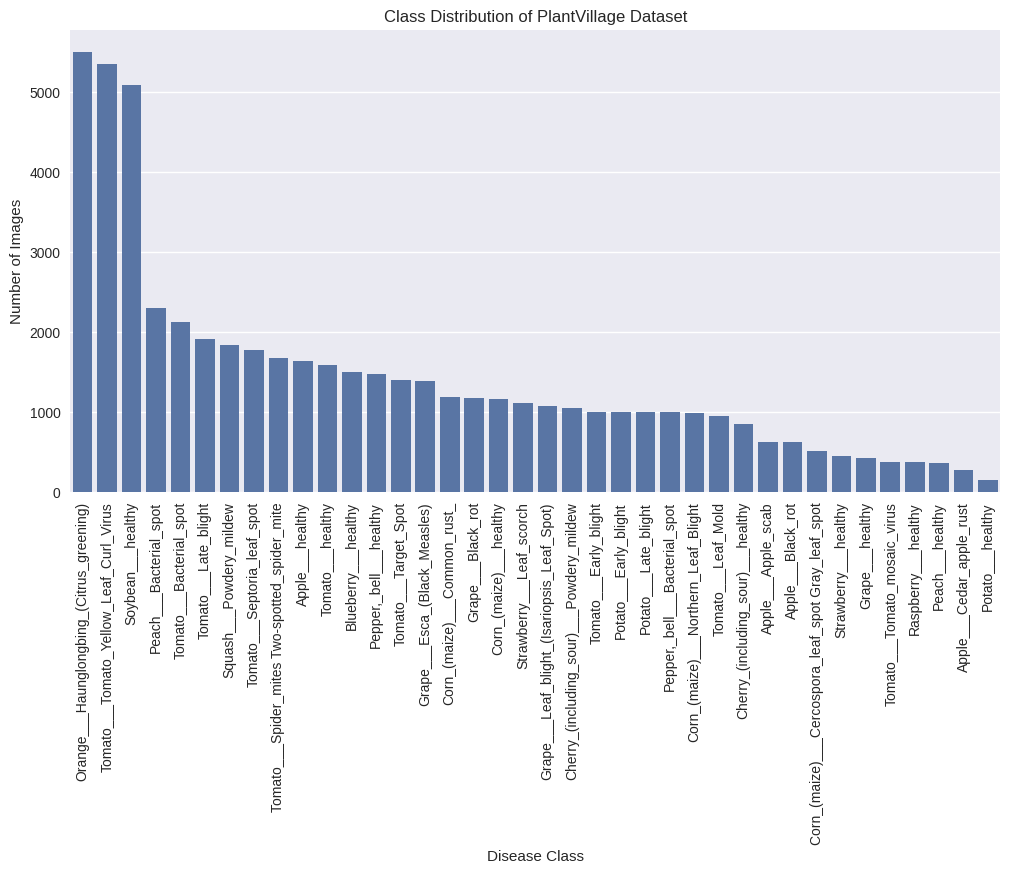

In [4]:
plt.figure(figsize=(12, 6))
class_counts = df["class"].value_counts()

sns.barplot(
    x=class_counts.index,
    y=class_counts.values
)
plt.xticks(rotation=90)
plt.title("Class Distribution of PlantVillage Dataset")
plt.ylabel("Number of Images")
plt.xlabel("Disease Class")
plt.show()



****### Class Distribution ObservationsThe dataset shows noticeable class imbalance. Some disease classes have significantlymore images than others, which may bias the learning process toward majority classesif not handled carefully.****


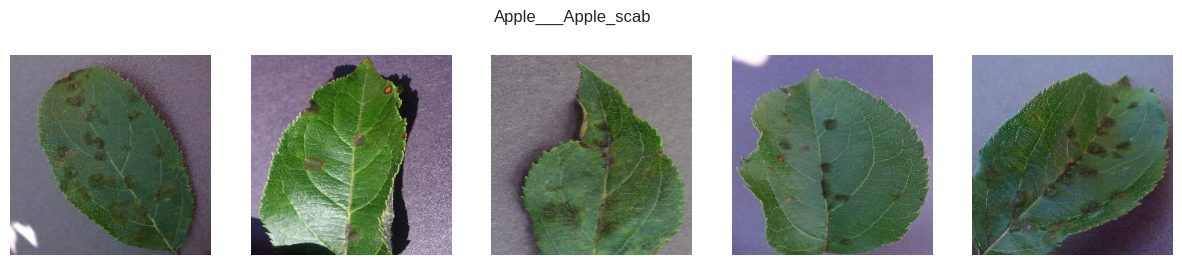

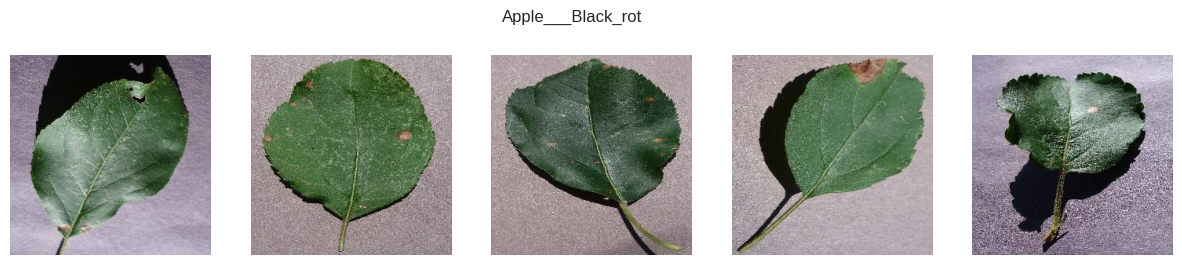

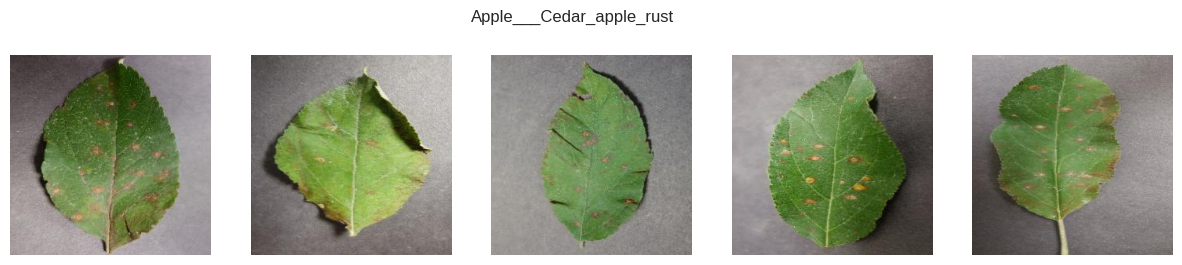

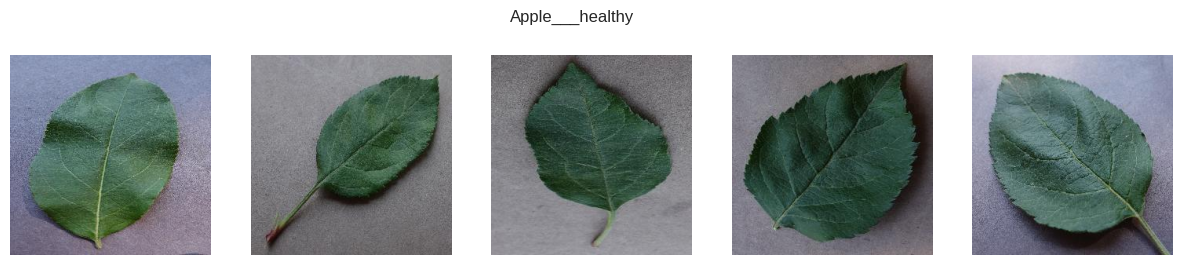

In [5]:
def show_images(class_name, n=5):
    imgs = df[df["class"] == class_name]["image_path"].sample(n)
    plt.figure(figsize=(15, 3))
    for i, path in enumerate(imgs):
        img = Image.open(path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(class_name)
    plt.show()

# Show for 3–4 representative classes
for cls in classes[:4]:
    show_images(cls, n=5)


### 👆Visual Inspection Insights

Many disease classes share strong visual similarities.
Disease symptoms are often subtle and localized, making this a fine-grained
image classification problem.


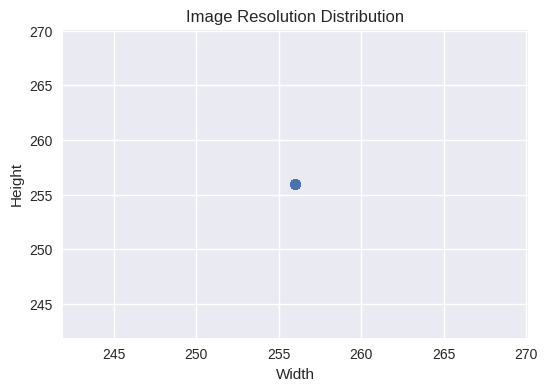

In [6]:
df["aspect_ratio"] = df["width"] / df["height"]

plt.figure(figsize=(6, 4))
plt.scatter(df["width"], df["height"], alpha=0.3)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.show()


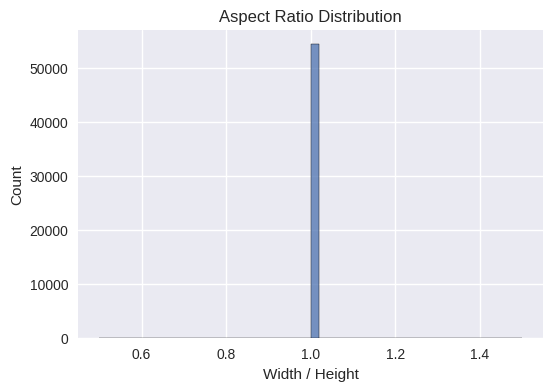

In [7]:
plt.figure(figsize=(6, 4))
sns.histplot(df["aspect_ratio"], bins=50)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()


###👆 Image Geometry Observations

Most images have similar resolutions and aspect ratios, suggesting that
non-destructive resizing strategies are likely safe.
However, aggressive downscaling may remove small disease-specific features.


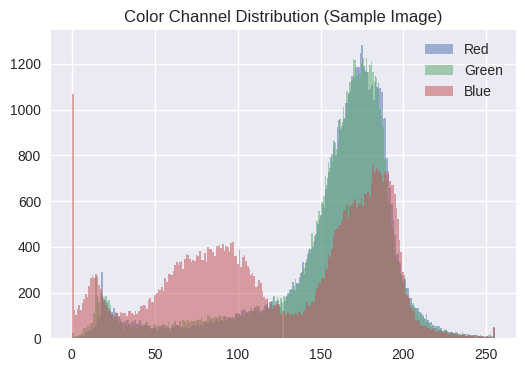

In [8]:
sample_img = Image.open(df.sample(1)["image_path"].values[0])
img_arr = np.array(sample_img)

plt.figure(figsize=(6,4))
plt.hist(img_arr[:,:,0].ravel(), bins=256, alpha=0.5, label="Red")
plt.hist(img_arr[:,:,1].ravel(), bins=256, alpha=0.5, label="Green")
plt.hist(img_arr[:,:,2].ravel(), bins=256, alpha=0.5, label="Blue")
plt.legend()
plt.title("Color Channel Distribution (Sample Image)")
plt.show()


## Key Takeaways from EDA

1. The dataset exhibits class imbalance, which may bias models toward dominant diseases.
2. Disease symptoms are subtle and localized, making classification challenging.
3. Images are relatively clean and well-lit, which may reduce robustness to real-world conditions.
4. Image resolutions are mostly consistent, simplifying preprocessing decisions.
